In [433]:
import os
import sys
while not os.getcwd().endswith('ml'):
    os.chdir('..')
sys.path.insert(0, os.getcwd())

In [434]:
import kaggle_problems.rosneft_proppant.RPCC_metric_utils_for_participants as metrics
from kaggle_problems.rosneft_proppant.workspace.common import bins_dict
import pandas as pd
import numpy as np
import copy
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)

In [435]:
COLORED_IMG_DIR = "kaggle_problems/rosneft_proppant/workspace/data/colored_main_area"
BW_IMG_DIR = "kaggle_problems/rosneft_proppant/workspace/data/bw_main_area"
colored_img = [int(img[:-len(".jpg")]) for img in os.listdir(COLORED_IMG_DIR) if img.endswith('.jpg')]
bw_img = [int(img[:-len(".jpg")]) for img in os.listdir(BW_IMG_DIR) if img.endswith('.jpg')]

In [436]:
print(os.listdir(COLORED_IMG_DIR))

['189.jpg', '77.jpg', '360.jpg', '412.jpg', '599.jpg', '200.jpg', '573.jpg', '598.jpg', '361.jpg', '74.jpg', '439.jpg', '377.jpg', '411.jpg', '766.jpg', '202.jpg', '558.jpg', '612.jpg', '372.jpg', '428.jpg', '206.jpg', '213.jpg', '398.jpg', '159.jpg', '72.jpg', '99.jpg', '588.jpg', '775.jpg', '748.jpg', '760.jpg', '614.jpg', '166.jpg', '9.jpg', '129.jpg', '673.jpg', '317.jpg', '511.jpg', '464.jpg', '699.jpg', '116.jpg', '670.jpg', '102.jpg', '314.jpg', '301.jpg', '473.jpg', '659.jpg', '311.jpg', '265.jpg', '502.jpg', '338.jpg', '648.jpg', '39.jpg', '11.jpg', '299.jpg', '500.jpg', '717.jpg', '501.jpg', '273.jpg', '10.jpg', '134.jpg', '487.jpg', '322.jpg', '336.jpg', '281.jpg', '445.jpg', '479.jpg', '135.jpg', '647.jpg', '309.jpg', '321.jpg', '282.jpg', '533.jpg', '526.jpg', '644.jpg', '122.jpg', '687.jpg', '668.jpg', '318.jpg', '278.jpg', '279.jpg', '331.jpg', '457.jpg', '127.jpg', '133.jpg', '657.jpg', '482.jpg', '290.jpg', '247.jpg', '737.jpg', '508.jpg', '483.jpg', '656.jpg', '19.jpg

In [437]:
predicted = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/answers.csv")
train = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/data/labels/train.csv")

In [438]:
# train = train[~train.prop_count.isna()]
# train = train[~train['30'].isna()]
# train

In [439]:
# train[train.ImageId.isin(predicted.ImageId.unique())]

In [440]:
print(len(predicted[predicted.ImageId == 112]))

1870


In [441]:
#predicted = predicted[predicted.ImageId.isin(bw_img)]
#predicted.prop_size *= 0.79
metrics.contest_metric(train, predicted)

(0.06559767259912958, 0.080245598738849, 0.043625783389550435)

In [414]:
metric1 = {}
metric2 = {}
for img in predicted.ImageId.unique():
    img_predicted = predicted[predicted.ImageId==img]
    img_train = train[train.ImageId==img] 
    
    if (np.any(img_train['20'].isna())):
        continue
    
    metric = metrics.contest_metric(img_train, img_predicted)
    
    metric1[img] = metric[1]
    metric2[img] = metric[2]

In [365]:
{key: value for (key, value) in metric1.items() if value > 0.5}

{766: 0.8318248390095944,
 202: 0.7721086306958109,
 748: 0.7723672737156486,
 598: 0.8320320429400101,
 479: 0.7717958696368745,
 223: 0.7714907923235816}

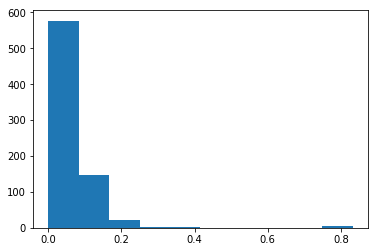

In [366]:
plt.hist(metric1.values(), bins=10)
plt.show()

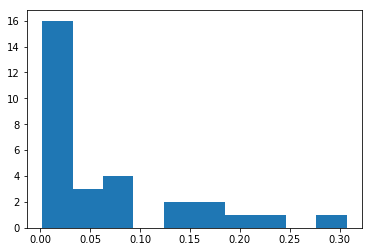

In [367]:
plt.hist(metric2.values(), bins=10)
plt.show()

In [95]:
# (0.11196267576564962, 0.15300247324857455, 0.05040297954126225)

In [107]:
predicted = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/answers.csv")
predicted = predicted[predicted.ImageId.isin(bw_img)]
mi = 10
mi_c = -1
for c in np.arange(0.5, 1.3, 0.01):

    _predicted = copy.deepcopy(predicted)
    _predicted['prop_size'] *= c;
    res = metrics.contest_metric(train, _predicted)
    if (mi > res[1]):
        mi = res[1]
        mi_c = c;
        
print(mi_c, mi)


0.9500000000000004 0.07639451056616114


In [1174]:
print(best_mi_c)

NameError: name 'best_mi_c' is not defined

In [1175]:
print(len(predicted.ImageId.unique()))

1


In [ ]:
colored_img = [img[:-len(".jpg")] for img in os.listdir(COLORED_IMG_DIR) if img.endswith('.jpg')]
bw_img = [img[:-len(".jpg")] for img in os.listdir(BW_IMG_DIR) if img.endswith('.jpg')]

In [ ]:
#train = train[np.logical_and(~train.prop_count.isnull(), ~train['16'].isnull())]

In [ ]:
train[train.ImageId.isin(colored_img)].describe()

In [ ]:
bins = ['6', '7', '8', '10', '12', '14', '16', '18', '20', '25', '30', '35', '40', '45', '50', '60', '70', '80', '100']
bins_mm = [
    3.35,
    2.8,
    2.36,
    2.,
    1.7,
    1.4,
    1.18,
    1.,
    0.85,
    0.71,
    0.6,
    0.5,
    0.425,
    0.355,
    0.3,
    0.25,
    0.212,
    0.18,
    0.15
]
bins_pixel = [b * 30 for b in bins_mm]
bins_dict = {key: value for key, value in zip(bins, bins_pixel)}
print(bins_dict)

In [ ]:
#print([str(i) + ".jpg"  for i in train[np.logical_and(~train.prop_count.isnull(), ~train['16'].isnull())]['ImageId'].to_numpy()])

In [ ]:
train = train[train.ImageId == 8]
predicted = predicted[predicted.ImageId == 8]

In [ ]:
print(train)

In [ ]:
plt.hist(predicted.prop_size.values, bins=100)
plt.show()

In [ ]:
print(len(predicted))

In [ ]:
train[~train.prop_count.isnull()]

In [ ]:
# best_mi_c = []
# for img in [ 41,  42,  47,  73, 100, 112, 151, 152, 179, 191, 214, 215, 227, 237, 308, 348, 416, 424, 440, 492, 496, 524, 553, 592, 616, 655, 714]:

#     print(img)
#     predicted = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/answers.csv")
#     train = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/data/labels/labels.csv")

#     train = train[train.ImageId == img]
#     predicted = predicted[predicted.ImageId == img]

#     mi = 10
#     mi_c = -1
#     for c in np.arange(0.5, 1., 0.01):
#         _predicted = copy.deepcopy(predicted)
#         _predicted['prop_size'] *= c;
#         res = metrics.contest_metric(train, _predicted)
#         if (mi > res[0]):
#             mi = res[0]
#             mi_c = c;
#     best_mi_c.append(mi_c)